In [ ]:
import math
import torch
import matplotlib.pyplot as plt
from torch.distributions import MultivariateNormal

In [ ]:
torch.set_printoptions(precision=4, sci_mode=False)

## 1. Randomly-Generated Data

In [ ]:
n_clusters = 10
n_samples = 250

In [ ]:
random_centers = torch.rand((n_clusters, 2)) * 100 - 50

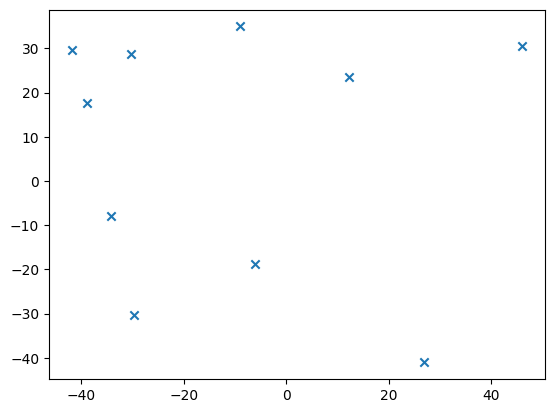

In [ ]:
plt.scatter(random_centers[...,0], random_centers[...,1], marker="x");

In [ ]:
def generate_data(clusters: torch.Tensor, n: int):
    from itertools import chain
    colors = torch.as_tensor(list(chain(*[[i]*n for i in range(clusters.shape[0])])))
    return (
        torch.cat([
            MultivariateNormal(center, torch.diag(torch.tensor([5., 5.]))).sample((n,))
            for center in clusters
        ]),
        colors
    )

In [ ]:
data, clusters = generate_data(random_centers, n_samples)

In [ ]:
def plot_data(X, clusters, centers):
    assert len(X) == len(clusters)
    _, ax = plt.subplots(1, 1)
    ax.scatter(X[...,0], X[...,1], c=clusters, cmap="tab10", marker=".", s=2)
    ax.scatter(centers[..., 0], centers[..., 1], c="black", marker="X", s=20)
    ax.scatter(centers[..., 0], centers[..., 1], c="white", marker="x", s=10)    

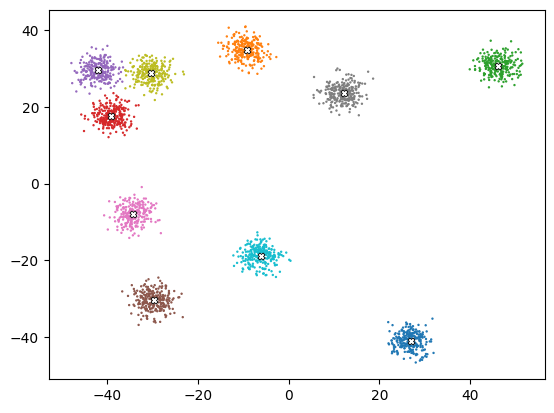

In [ ]:
plot_data(data, clusters, random_centers)

## 2. Mean Shift Clustering

In [ ]:
def gaussian(data: torch.Tensor, bw: float): 
    return torch.exp(-0.5*(data/bw)**2) / (bw*math.sqrt(2*math.pi))

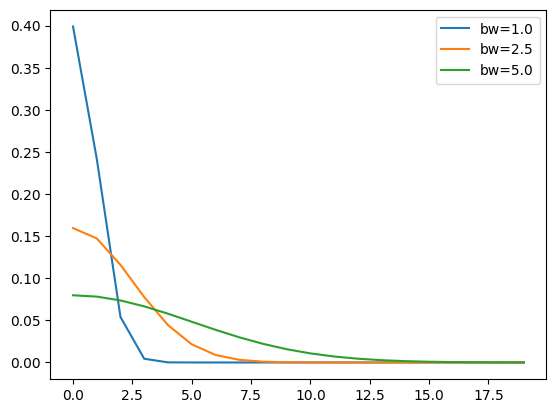

In [ ]:
[plt.plot(gaussian(torch.arange(20), bw), label=f"bw={bw}") for bw in (1., 2.5, 5.)]
plt.legend()
plt.show()

### 2.1. One Sample

In [ ]:
X = data
x = X[0]
x, x.shape, X.shape

(tensor([ 26.4399, -37.4504]), torch.Size([2]), torch.Size([2500, 2]))

In [ ]:
weight_to_x = gaussian((x - X).pow(2).sum(1).sqrt(), 2.5)

In [ ]:
weight_to_x.shape, X.shape

(torch.Size([2500]), torch.Size([2500, 2]))

In [ ]:
delta = (weight_to_x[:,None] * X).sum(0)/weight_to_x.sum()
delta

tensor([ 26.6767, -39.4826])

### 2.2. All Samples

In [ ]:
X = data.clone()

In [ ]:
W = (X[None] - X[:,None]).pow(2).sum(2).sqrt()

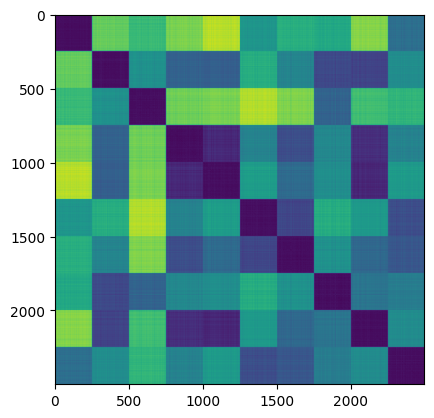

In [ ]:
plt.imshow(W);

In [ ]:
W.shape, X.shape

(torch.Size([2500, 2500]), torch.Size([2500, 2]))

In [ ]:
(W @ X)/W.sum(1)[:,None]

tensor([[-16.7275,  15.7306],
        [-16.5828,  15.8860],
        [-16.5674,  15.8595],
        ...,
        [ -7.2689,  15.3314],
        [ -7.3462,  15.4111],
        [ -9.8360,  15.8829]])

In [ ]:
X = data.clone()
for _ in range(15):
    W = gaussian((X[None] - X[:, None]).pow(2).sum(2).sqrt(), 2.5)
    X = (W @ X)/W.sum(1, keepdim=True)

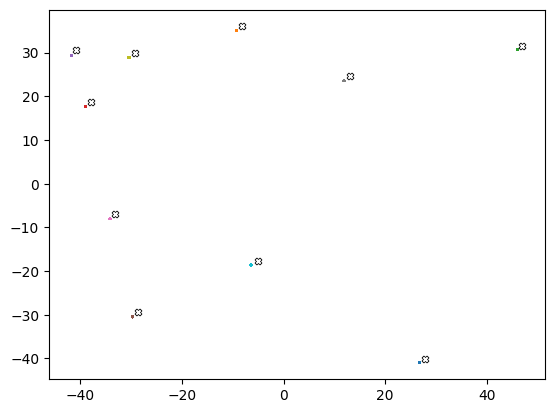

In [ ]:
plot_data(X, clusters, random_centers + 1)

In [ ]:
ms_centers, ms_clusters = X.unique(dim=0, return_inverse=True)

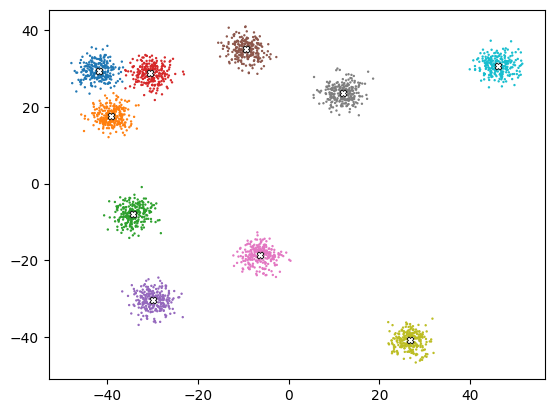

In [ ]:
plot_data(data, ms_clusters, ms_centers)